## Nuclear explosions from Data is Plural:

JSVine describes the data: 

    "Explosions listed in the **Stockholm International Peace Research Institute’s “Nuclear Explosions, 1945–1998” (PDF) report.** Both datasets list the date and location of each explosion, the country responsible, the detonation site, and (where known) its explosive yield, among other variables. And both reports use unconventional formatting, so I’ve extracted a couple of CSVs for you."

CSVs from Jeremy Singer Vine's site: https://github.com/data-is-plural/nuclear-explosions/blob/master/

A couple of different ways this data has been visualized: https://flowingdata.com/2015/08/19/nuclear-detonations-from-1945-to-present/
    
## Data Dictionary: 

#### DATE
                (UTC time) yymmdd, yy=year-1900, mm=month, dd=day of month

#### TP : Testing Party
                  US=United States, GB=UK, CP=USSR, FR=France, IN=India
                  PC=People's Republic of China
                  IS=Israel, but the 790922 event is only putative
                  PK=Pakistan
                  NK=North Korea
                  
#### Test or explosion site

        Note that the UK Christmas Island site has been used for some US atmospheric tests. In exchange, the US has  
        allowed the UK to conduct underground tests at the Nevada Test Site.
  
      ANM= Alamogordo, New Mexico, USA (US atmospheric test)
      HRJ= Hiroshima, Japan (US/warfare)
      NGJ= Nagasaki, Japan (US/warfare)
      BKN= Bikini (US atmospheric tests)
      ENW= Enwetak (US atmospheric tests)
      CNV= Centra Nevada (US underground test)
      NTS= Nevada Test Site, Nevada, USA (US atmospheric and underground and
                                      UK underground tests)
      FMT= Farmington, New Mexico (US underground natural gas stimulation test)
      MBI= Monte Bello Islands, Australia (UK atmospheric test)
      EMU= Emu Field, 480 kilometers SW of Woomera, Australia (UK atmospheric tests)
      PAC= Various Pacific Ocean sites
      MAR= Maralinga, Australia (UK atmospheric tests)
      CHR= Christmas Island (UK and US atmospheric tests)
      NZ = Novaya Zemlya, USSR (USSR atmospheric and underground tests)
      KTS= Eastern Kazakh or Semipalitinsk test site, USSR (USSR atmospheric and
                                                        underground tests)
      REG= Reggane Proving Grounds, Algeria (French Atmospheric Tests)
      ECK= Ecker, Algeria (French Underground tests)
      CLS= Carlsbad, New Mexico, USA (US underground test)
      JON= Johnston Island (US atmospheric tests)
      FAL= Fallon, Nevada, USA (US underground test)
      LNR= Lop Nor, PRC (PRC atmospheric and underground tests)
      AMC= Amchitka Island, Aleutians, Alaska, USA (US underground tests)
      MUR= Muruora Is. (French atmospheric and underground tests)
      FAN= Fangataufa Is. (French atmospheric and underground tests)
      HTB= Hattiesburg, Mississippi, USA (US underground tests)
      GRV= Grand Valley, Colorado, USA (US natural gas stimulation)
      RAJ= Pokhran, Rajasthan Desert, India (Indian underground test)
      IS?IN= Indian Ocean (putative Israeli Test)
      RFL= Rifle, Colorado, USA (3x33kt simultaneous gas stimulation shots)
      SAT= South Atlantic Ocean (three US tests, rocket to 482 kilometers altitude)
      MAL= Malden Island (UK atmospheric tests)
      KPY= Kapustin Yar (USSR)
      SYS= Sary Shagan (USSR)
      YAK= Various sites in Yakutia (USSR)
      CHA= Chagai Hills, Dist. of Quetta, Baluchistan, Pakistan (PK underground)

      USSR sites other than NZ and KTS. A large number of blasts, some or many
       of which were for engineering purposes (possibly similar to US
       Plowshare tests) were fired underground at many locations. Latitude
       and Longitude for most of these are given in the tables. These tests,
       US plowshare tests, and the one Indian test, were announced by the
       testing parties to be PNEs (Peaceful Nuclear Explosions). 

#### TYPE

      AIRD=airdrop
      ART =artillery shell
      ATMO=in or above the atmosphere
      BALN=balloon
      BARG=barge
      CRAT=crater
      RC  ="roman candle"=open vertical shaft
      ROCH=rocket
      SHFT=stemmed vertical shaft
      SS1 =simultaneous shot in shaft 1
      SS2 =simultaneous shot in shaft 2
      SSn =simultaneous shot in shaft n
           (If several simultaneous tests were in the same shaft [usually at
            different depths] they will all be listed SS1. If three were shot 
            simultaneously in three separate shafts they will be SS1, SS2, 
            and SS3).
      SURF=surface (unknown but probably not airdropped, near surface, includes
                    tower and barge)
      TOWR=tower
      TUNN=tunnel
      UNDW=underwater
      
#### Explosive Yield (in Kilotons)

               Britannica says: Nuclear weapons produce enormous explosive energy. Their significance may best 
               be appreciated by the coining of the words kiloton (1,000 tons) and megaton (1,000,000 tons) to 
               describe their blast energy in equivalent weights of the conventional chemical explosive TNT.
                   
                   
               NOTE decimal points are not 
               all lined up vertically. This could be a problem in any machine
               processing as could l, g, LOW, HIGH, -, SLIGHT, FIZZ.
               Unless there is a single number
               without a l, g, or - , assume the yield is unknown and very 
               approximate.
               FIZZ=fizzle or failure with extremely low yield. F followed by
               a number, eg F300, is a test which had a smaller yield than
               expected. Apparently some fizzles were two-stage devices in    
               which the fusion stage produced little or no yield.

#### PU : Purpose
            WR=weapons related, **=war, WE=weapons effects, SF=safety
            PS=Plowshare (US PNE engineering shots)
            VU=US Vela Uniform-directed toward seismic detection of
               underground shots
               
#### NAME : Name of explosion

     All US announced, and a few French, and all UK
     underground tests have a name. In early US atmospheric testing some
     names were reused. When the names are too long for the table, any space
     is first dropped, and second, the name is truncated, not abbreviated.
     **A few words appear often enough as the component of a name that they
     are abberviated by a lower case letter as follows:
         g=GERBOISE, m=MIST, y=MISTY, p=PRIME, d=DIAMOND** 
     A * in the first column of the name indicates a putative nuclear test
     (ie. not announced or acknowledged by the PRESUMED testing party).
     A second * in the name column indicates some doubt about wheither the
     event was a nuclear explosion. A number of US tests listed only by
     N (NRDC), which have ** in the name column, may be cavity collapses from
     previous tests, or earthquakes, but they may include some unannounced
     nuclear explosions.

For more information:
                           https://www.sipri.org/databases

In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42

import numpy as np

plt.style.use('ggplot')
%matplotlib inline

In [2]:
df = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/oklahoma_nuclear/sipri_report_explosions.csv')
df.head(50)

,date,origin_t,id_no,country,region,source,latitude,longitude,mb,Ms,depth,yield_1,yield_u,purpose,name,type,date_long,year
0,450716,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.100,21.0,21.0,WR,TRINITY,TOWER,19450716,1945
1,450805,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.600,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP,19450805,1945
2,450809,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.600,21.0,21.0,COMBAT,FATMAN,AIRDROP,19450809,1945
3,460630,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.200,21.0,21.0,WE,ABLE,AIRDROP,19460630,1946
4,460724,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.030,21.0,21.0,WE,BAKER,UW,19460724,1946
5,480414,181700.0,48001,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.080,37.0,37.0,WR,X-RAY,TOWER,19480414,1948
6,480430,180900.0,48002,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.080,49.0,49.0,WR,YOKE,TOWER,19480430,1948
7,480514,180400.0,48003,USA,ENEWETAK,DOE,11.30,162.15,0.0,0.0,-0.080,18.0,18.0,WR,ZEBRA,TOWER,19480514,1948
8,490829,12000.0,49001,USSR,SEMI KAZAKH,DOE,48.00,76.00,0.0,0.0,0.000,22.0,22.0,WR,NaN,SURFACE,19490829,1949
9,510127,134500.0,51001,USA,NTS,DOE,37.00,-116.00,0.0,0.0,-0.350,1.0,1.0,WR,ABLE,AIRDROP,19510127,1951


In [3]:
df.dtypes

date           int64
origin_t     float64
id_no          int64
country       object
region        object
source        object
latitude     float64
longitude    float64
mb           float64
Ms           float64
depth        float64
yield_1      float64
yield_u      float64
purpose       object
name          object
type          object
date_long      int64
year           int64
dtype: object

In [4]:
#import the dataframe and change it to a geodataframe
df = pd.read_csv('/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/oklahoma_nuclear/sipri_report_explosions.csv')
points = df.apply(lambda row: Point(row.longitude, row.latitude), axis=1)
df = gpd.GeoDataFrame(df, geometry=points)
df.crs = {'init': 'epsg:4326'}
df.head()

,date,origin_t,id_no,country,region,source,latitude,longitude,mb,Ms,depth,yield_1,yield_u,purpose,name,type,date_long,year,geometry
0,450716,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER,19450716,1945,POINT (-105.57 32.54)
1,450805,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP,19450805,1945,POINT (132.27 34.23)
2,450809,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP,19450809,1945,POINT (129.52 32.45)
3,460630,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP,19460630,1946,POINT (165.2 11.35)
4,460724,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW,19460724,1946,POINT (165.2 11.35)


In [5]:
#do they reuse names? which ones?
df.name.value_counts().head()

VEGA      15
LIRA       6
GELIY      5
REGION     5
KRATON     4
Name: name, dtype: int64

**Vega**: the fifth brightest star in the sky, and the brightest in the constellation Lyra, overhead in summer to observers in the northern hemisphere.

**Lira**: ((did they spell it wrong? I'm assuming they mean this and not the Italian monetary unit)) a small northern constellation (the Lyre), said to represent the lyre invented by Hermes. It contains the bright star Vega.

**Geliy**: is a Russian name, "derived from the Ancient Greek “hḗlios ‎(ἥλιος)” Latinized as Helius (sun, east, day, sunshine). Helios was the personification of the Sun in Greek mythology. Helios was imagined as a handsome god crowned with the shining aureole of the Sun, who drove the chariot of the sun across the sky each day to earth-circling Oceanus and through the world-ocean returned to the East at night."

**Region**: ???

**Gorizont**: 

In [37]:
df.country.value_counts()

USA       1032
USSR       714
FRANCE     210
UK          45
CHINA       45
INDIA        3
PAKIST       2
Name: country, dtype: int64

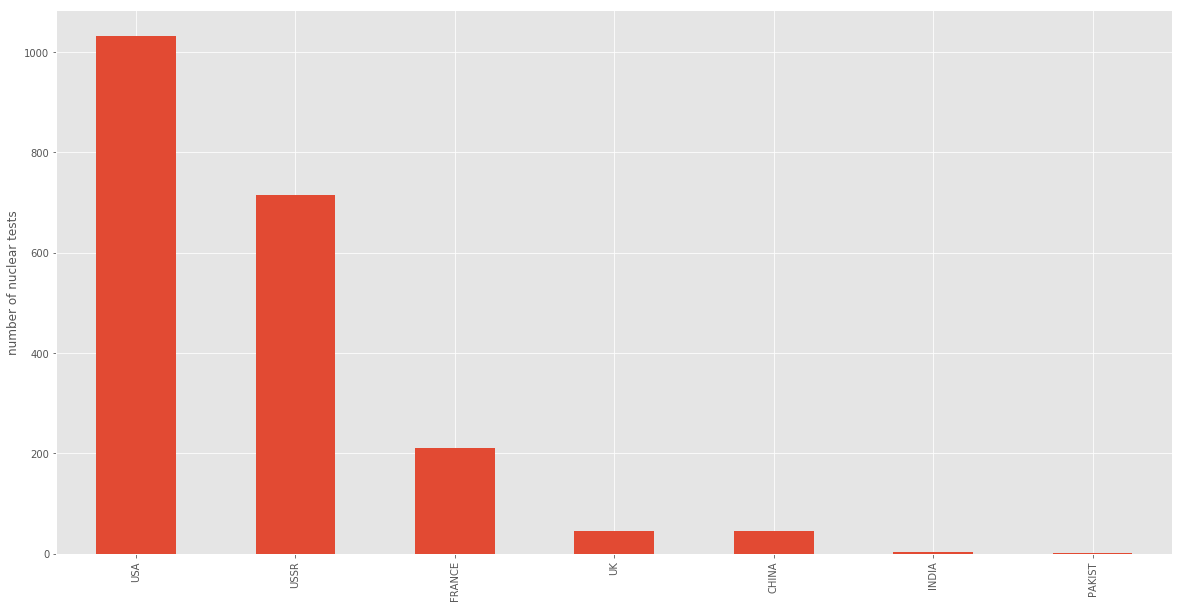

In [34]:
#I'm assuming we win at nuclear testing but let's look.
ax = df.country.value_counts().plot(kind='bar',figsize=(20,10))
ax.set_ylabel('number of nuclear tests')
plt.savefig('number_test_by_country.pdf')

In [7]:
#let's look at the yield column
df.yield_1.describe()

count     2048.000000
mean       209.217532
std       1641.346929
min          0.000000
25%          0.000000
50%          0.001000
75%         20.000000
max      50000.000000
Name: yield_1, dtype: float64

In [38]:
df.groupby('country')['yield_1'].mean().sort_values(ascending=False)

country
CHINA     391.930233
USSR      325.518864
UK        186.635556
USA       163.516426
FRANCE     10.571429
PAKIST      0.000000
INDIA       0.000000
Name: yield_1, dtype: float64

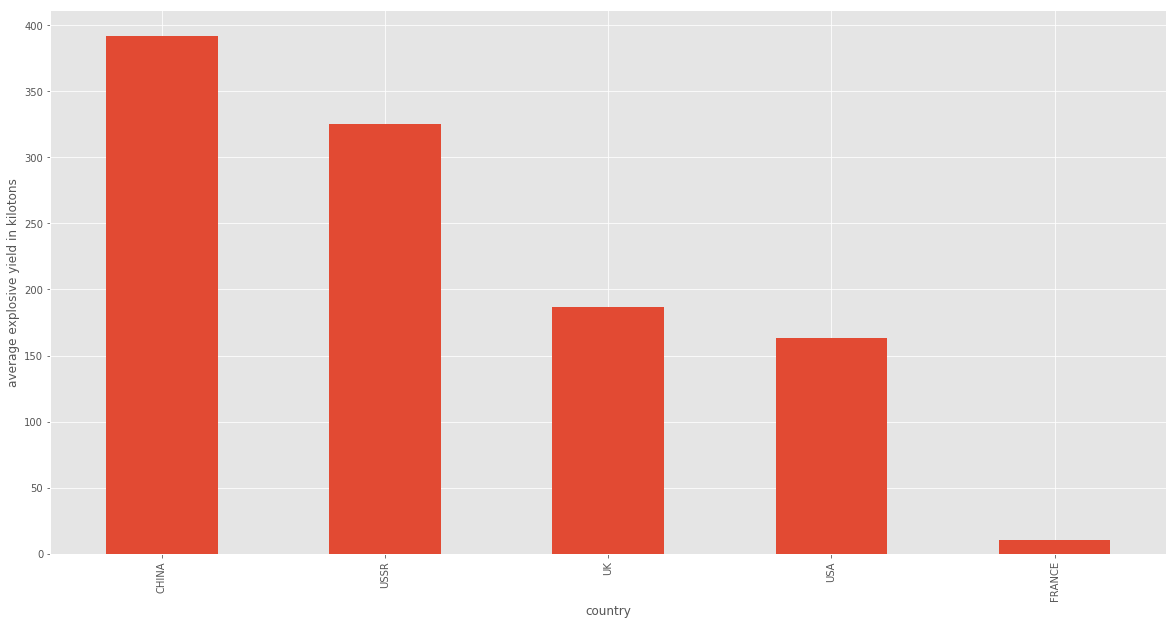

In [39]:
#okay so we definitely set off the most bombs
#but do we set off the biggest ones?
ax = df.groupby('country')['yield_1'].mean().sort_values(ascending=False).head().plot(kind='bar', figsize=(20,10))
ax.set_ylabel('average explosive yield in kilotons')
plt.savefig('avg_explosive_yield.pdf')

**That's sort of unexpected-that China has the highest explosive yield. Let's look at China vs the US.**

In [9]:

df[df['country'] == 'CHINA']['yield_1'].sort_values(ascending=False).head()

1055    3400.0
822     3300.0
938     3000.0
981     3000.0
1366    2000.0
Name: yield_1, dtype: float64

In [10]:
df[df['country'] == 'USA']['yield_1'].sort_values(ascending=False).head()

56     15000.0
60     13500.0
57     11000.0
36     10400.0
225     9300.0
Name: yield_1, dtype: float64

In [11]:
df[df['country'] == 'USSR']['yield_1'].sort_values(ascending=False).head()

355    50000.0
548    24200.0
448    21100.0
479    19100.0
346    12500.0
Name: yield_1, dtype: float64

**So China and the USSR aka Russia's nuclear tests are, on average, over 2x as big as the US. The UK conducts larger tests on average. Who has exploded the highest number of kilotons of explosives?**

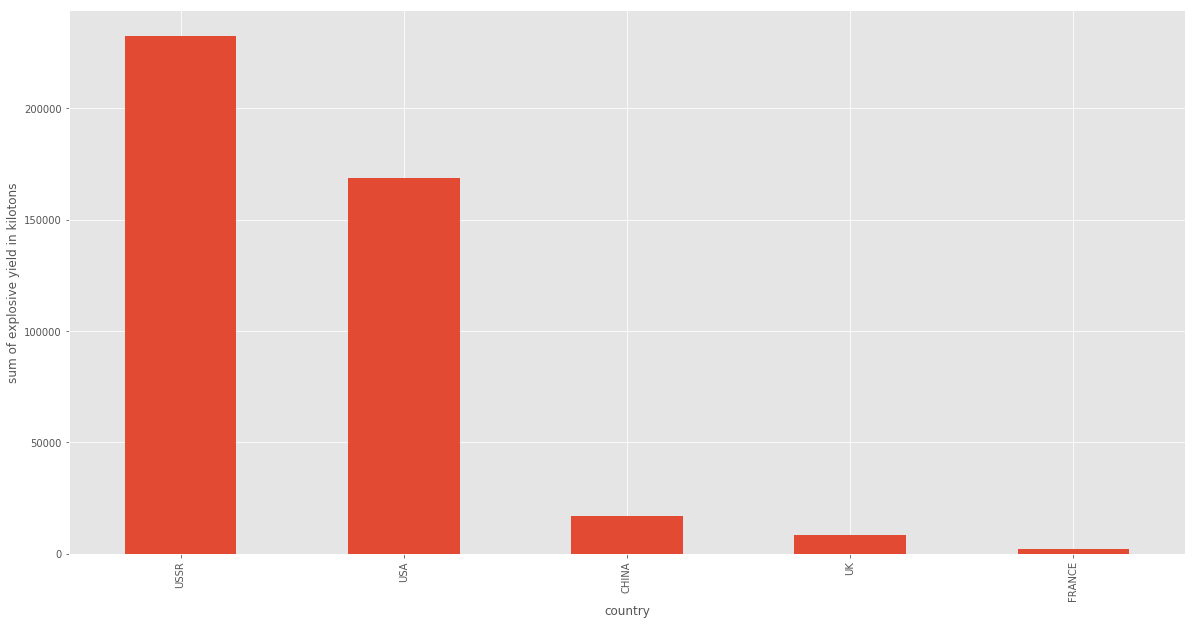

In [36]:
ax = df.groupby('country')['yield_1'].sum().sort_values(ascending=False).head().plot(kind='bar', figsize=(20,10))
ax.set_ylabel('sum of explosive yield in kilotons')
plt.savefig('sum_explosive_yield.pdf')

In [13]:
df.head()

,date,origin_t,id_no,country,region,source,latitude,longitude,mb,Ms,depth,yield_1,yield_u,purpose,name,type,date_long,year,geometry
0,450716,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER,19450716,1945,POINT (-105.57 32.54)
1,450805,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP,19450805,1945,POINT (132.27 34.23)
2,450809,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP,19450809,1945,POINT (129.52 32.45)
3,460630,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP,19460630,1946,POINT (165.2 11.35)
4,460724,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW,19460724,1946,POINT (165.2 11.35)


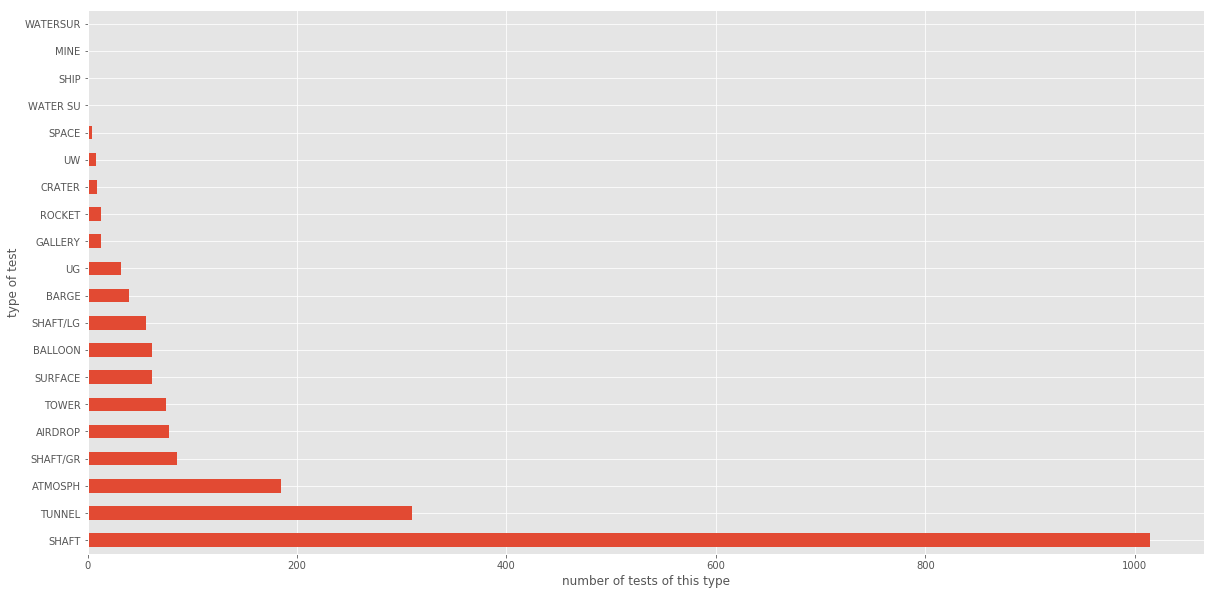

In [31]:
ax = df['type'].value_counts().plot(kind='barh', figsize=(20,10))
ax.set_xlabel('number of tests of this type')
ax.set_ylabel('type of test')
plt.savefig('type_nuclear_test.pdf')

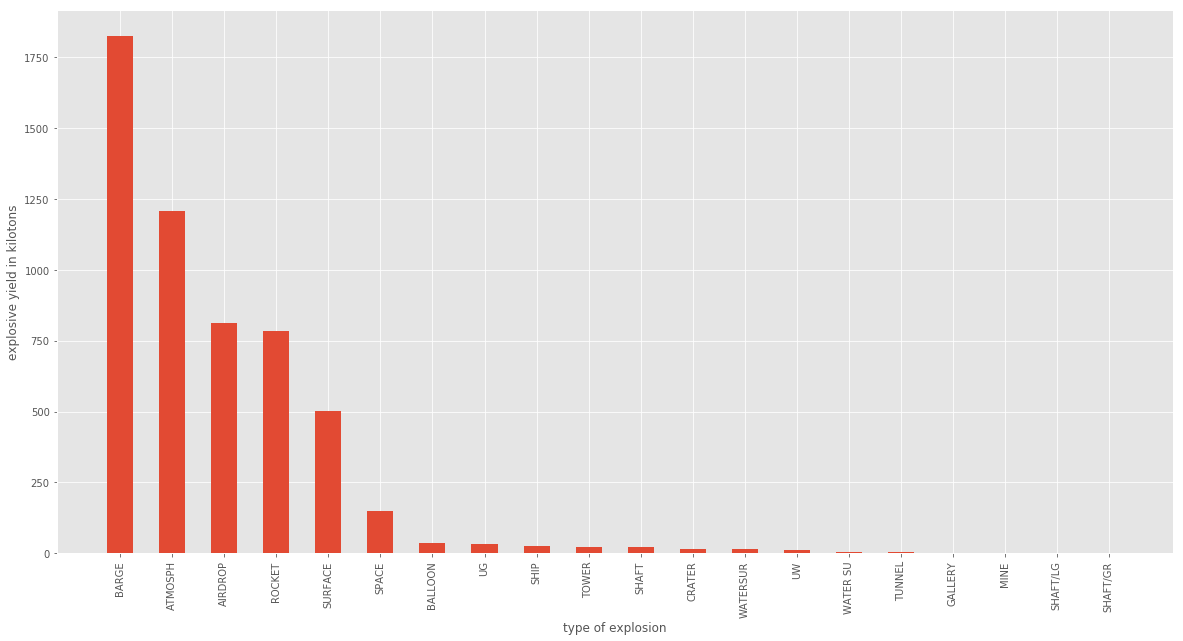

In [32]:
#what's the average yield of each type of 
#explosion? let's seeee
ax = df.groupby('type')['yield_1'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(20,10))
ax.set_xlabel('type of explosion')
ax.set_ylabel('explosive yield in kilotons')
ax.axis('auto')
plt.savefig('avg_yield_explosion_type.pdf')

### Changing the date to datetime and making graphs with that

Useful websites on resampling and the codes:

https://stackoverflow.com/questions/17001389/pandas-resample-documentation/17001474#17001474
http://benalexkeen.com/resampling-time-series-data-with-pandas/

In [16]:
#change date to datetime

df['date'] = pd.to_datetime(df['date_long'], format='%Y%m%d')
df.head()

,date,origin_t,id_no,country,region,source,latitude,longitude,mb,Ms,depth,yield_1,yield_u,purpose,name,type,date_long,year,geometry
0,1945-07-16,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER,19450716,1945,POINT (-105.57 32.54)
1,1945-08-05,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP,19450805,1945,POINT (132.27 34.23)
2,1945-08-09,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP,19450809,1945,POINT (129.52 32.45)
3,1946-06-30,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP,19460630,1946,POINT (165.2 11.35)
4,1946-07-24,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW,19460724,1946,POINT (165.2 11.35)


In [17]:
#can we groupby the country, keep the date column,
#and plot the yield, by country, over time?

In [18]:
#set the date as the index so we can resample
#and do useful things
df.set_index('date', inplace=True)

In [19]:
#check check it out
df.head()

,origin_t,id_no,country,region,source,latitude,longitude,mb,Ms,depth,yield_1,yield_u,purpose,name,type,date_long,year,geometry
date,,,,,,,,,,,,,,,,,,
1945-07-16,123000.0,45001,USA,ALAMOGORDO,DOE,32.54,-105.57,0.0,0.0,-0.10,21.0,21.0,WR,TRINITY,TOWER,19450716,1945,POINT (-105.57 32.54)
1945-08-05,231500.0,45002,USA,HIROSHIMA,DOE,34.23,132.27,0.0,0.0,-0.60,15.0,15.0,COMBAT,LITTLEBOY,AIRDROP,19450805,1945,POINT (132.27 34.23)
1945-08-09,15800.0,45003,USA,NAGASAKI,DOE,32.45,129.52,0.0,0.0,-0.60,21.0,21.0,COMBAT,FATMAN,AIRDROP,19450809,1945,POINT (129.52 32.45)
1946-06-30,220100.0,46001,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,-0.20,21.0,21.0,WE,ABLE,AIRDROP,19460630,1946,POINT (165.2 11.35)
1946-07-24,213500.0,46002,USA,BIKINI,DOE,11.35,165.20,0.0,0.0,0.03,21.0,21.0,WE,BAKER,UW,19460724,1946,POINT (165.2 11.35)


209.2175315917969

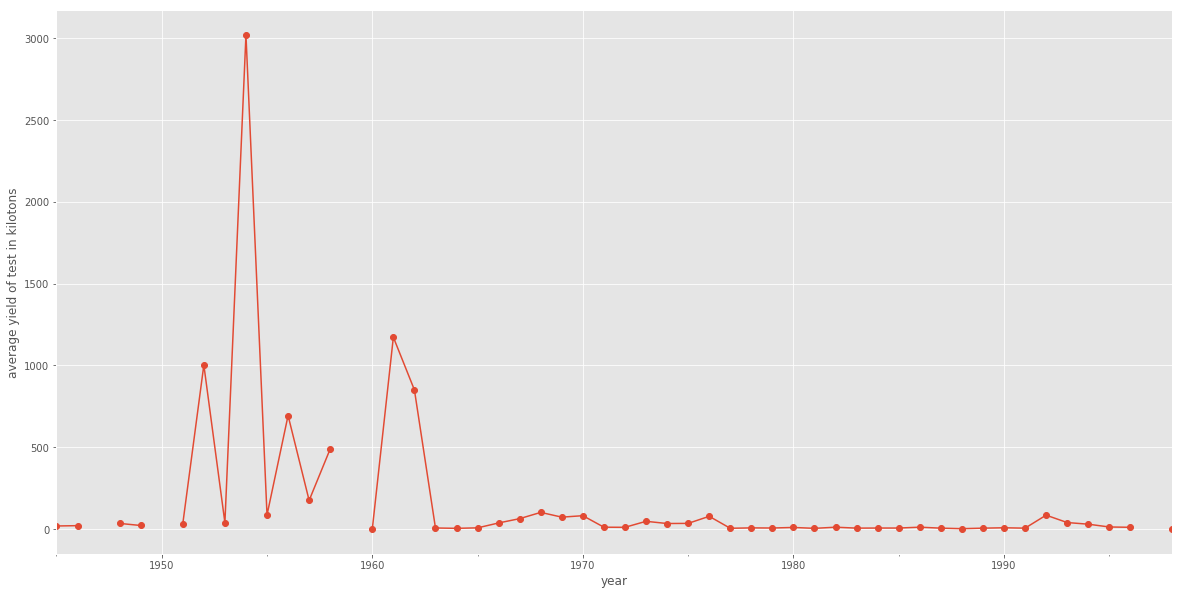

In [25]:
#how did the yields change over the years? A is year end frequency
#we're taking the mean of the yield_1 column
#over the years
ax = df.yield_1.resample('A').mean().plot(marker='o', figsize=(20,10))
ax.set_ylabel('average yield of test in kilotons')
ax.set_xlabel('year')
plt.savefig('yield_change_over_years.pdf')

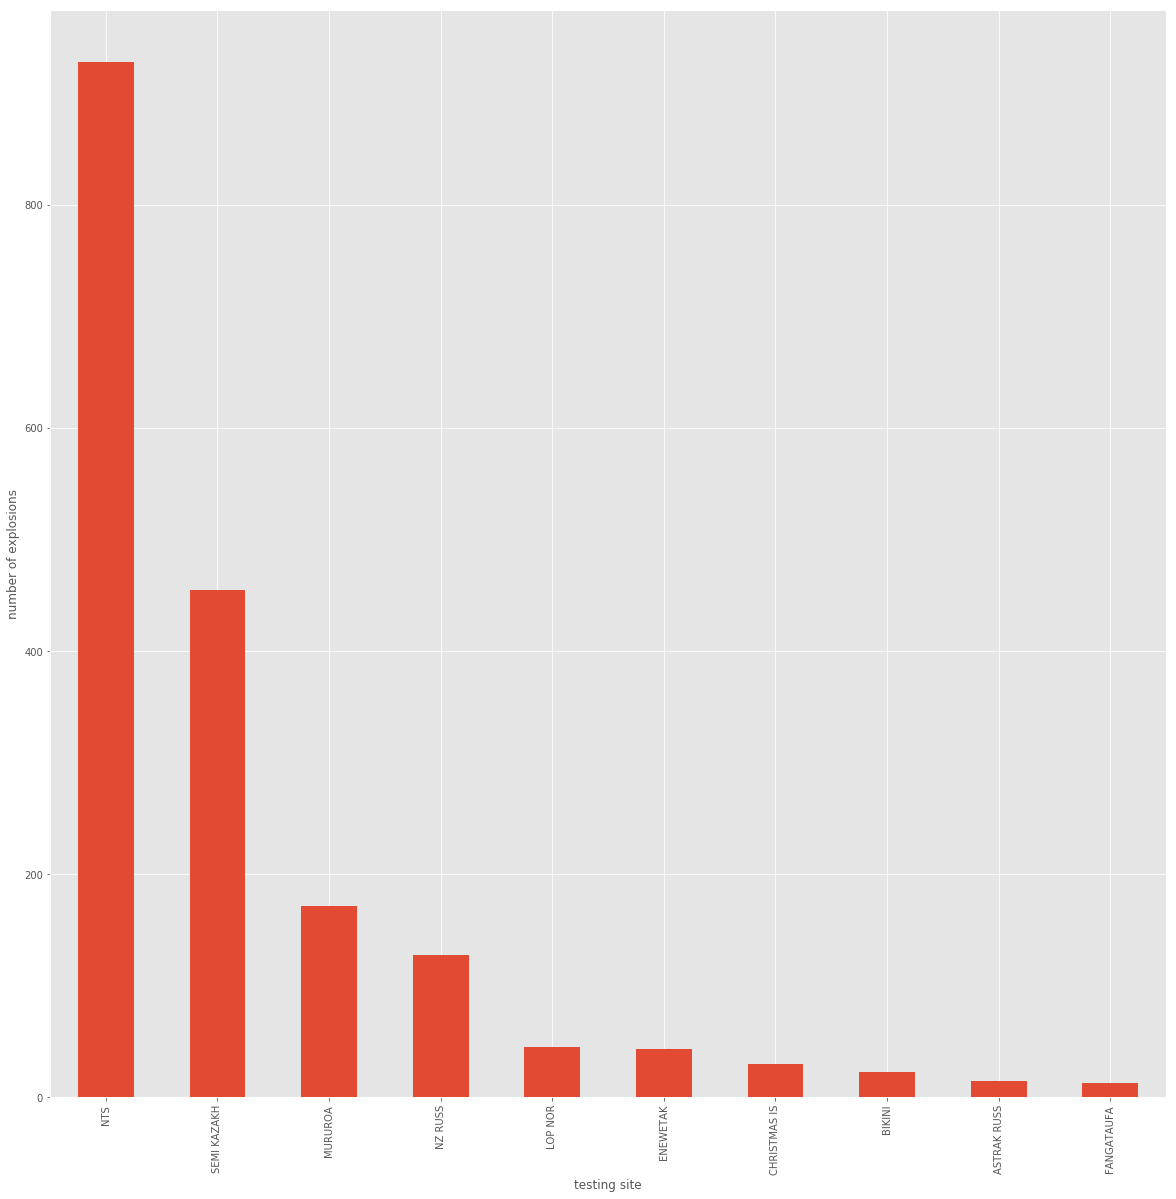

In [28]:
ax = df.region.value_counts().head(10).plot(kind='bar', figsize=(20,20))
ax.set_xlabel('testing site')
ax.set_ylabel('number of explosions')

In [22]:
df.purpose.value_counts().head()

WR     1495
WE      181
PNE     153
SE       71
FMS      33
Name: purpose, dtype: int64

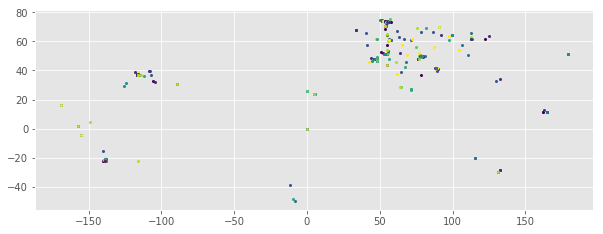

In [23]:
df.plot(figsize=(10,10))

In [24]:
world = gpd.read_file("/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/oklahoma_nuclear/world_shapefile/cntry00.shp")

OSError: no such file or directory: '/Users/kaitlincough/Documents/data_studio/data_studio_projects/code/oklahoma_nuclear/world_shapefile/cntry00.shp'

In [ ]:
world = world.to_crs(epsg=4326)
world.head()

In [ ]:
world.plot()

In [ ]:
ax = df.plot(figsize=(50,25), color='red', markersize=2)

ax = world.plot(ax=ax, color='lightgrey', edgecolor='white', figsize=(50,25))
ax.axis('off')
plt.savefig('nuclear.png')